In [57]:
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
import seaborn as sns
import matplotlib.pyplot as plt

In [25]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

df = pd.read_csv('d1.csv')

In [26]:
print(df)

          No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN  \
0          1    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5 -21.4   0.0   
1          2    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1 -22.1   0.0   
2          3    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3 -24.6   0.0   
3          4    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2 -25.5   0.0   
4          5    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1 -24.5   0.0   
...      ...    ...   ...  ...   ...    ...   ...   ...     ...   ...   ...   
35059  35060   14.0  21.0  3.0  27.0  400.0  72.0  12.5  1013.5 -16.2   0.0   
35060  35061   18.0  27.0  3.0  37.0  400.0  59.0  11.6  1013.6 -15.1   0.0   
35061  35062   15.0  39.0  5.0  50.0  600.0  41.0  10.8  1014.2 -13.3   0.0   
35062  35063   11.0  35.0  6.0  49.0  500.0  41.0  10.5  1014.4 -12.9   0.0   
35063  35064   10.0  28.0  7.0  48.0  600.0  39.0   8.6  1014.1 -15.9   0.0   

        wd  WSPM       station  target_class  
0   

In [27]:
df.columns

Index(['No', 'PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP',
       'RAIN', 'wd', 'WSPM', 'station', 'target_class'],
      dtype='object')

In [28]:
print(df['target_class'].value_counts())

target_class
0    15274
2    12117
4     4881
1     2048
3      744
Name: count, dtype: int64


In [29]:
df.head(5)

No  PM2.5  PM10  SO2   NO2     CO    O3  TEMP    PRES  DEWP  RAIN   wd  \
0   1    5.0  14.0  4.0  12.0  200.0  85.0  -0.5  1024.5 -21.4   0.0  NNW   
1   2    8.0  12.0  6.0  14.0  200.0  84.0  -0.7  1025.1 -22.1   0.0   NW   
2   3    3.0   6.0  5.0  14.0  200.0  83.0  -1.2  1025.3 -24.6   0.0  NNW   
3   4    5.0   5.0  5.0  14.0  200.0  84.0  -1.4  1026.2 -25.5   0.0    N   
4   5    5.0   5.0  6.0  21.0  200.0  77.0  -1.9  1027.1 -24.5   0.0  NNW   

   WSPM       station  target_class  
0   5.7  Nongzhanguan             0  
1   3.9  Nongzhanguan             0  
2   5.3  Nongzhanguan             0  
3   4.9  Nongzhanguan             0  
4   3.2  Nongzhanguan             0

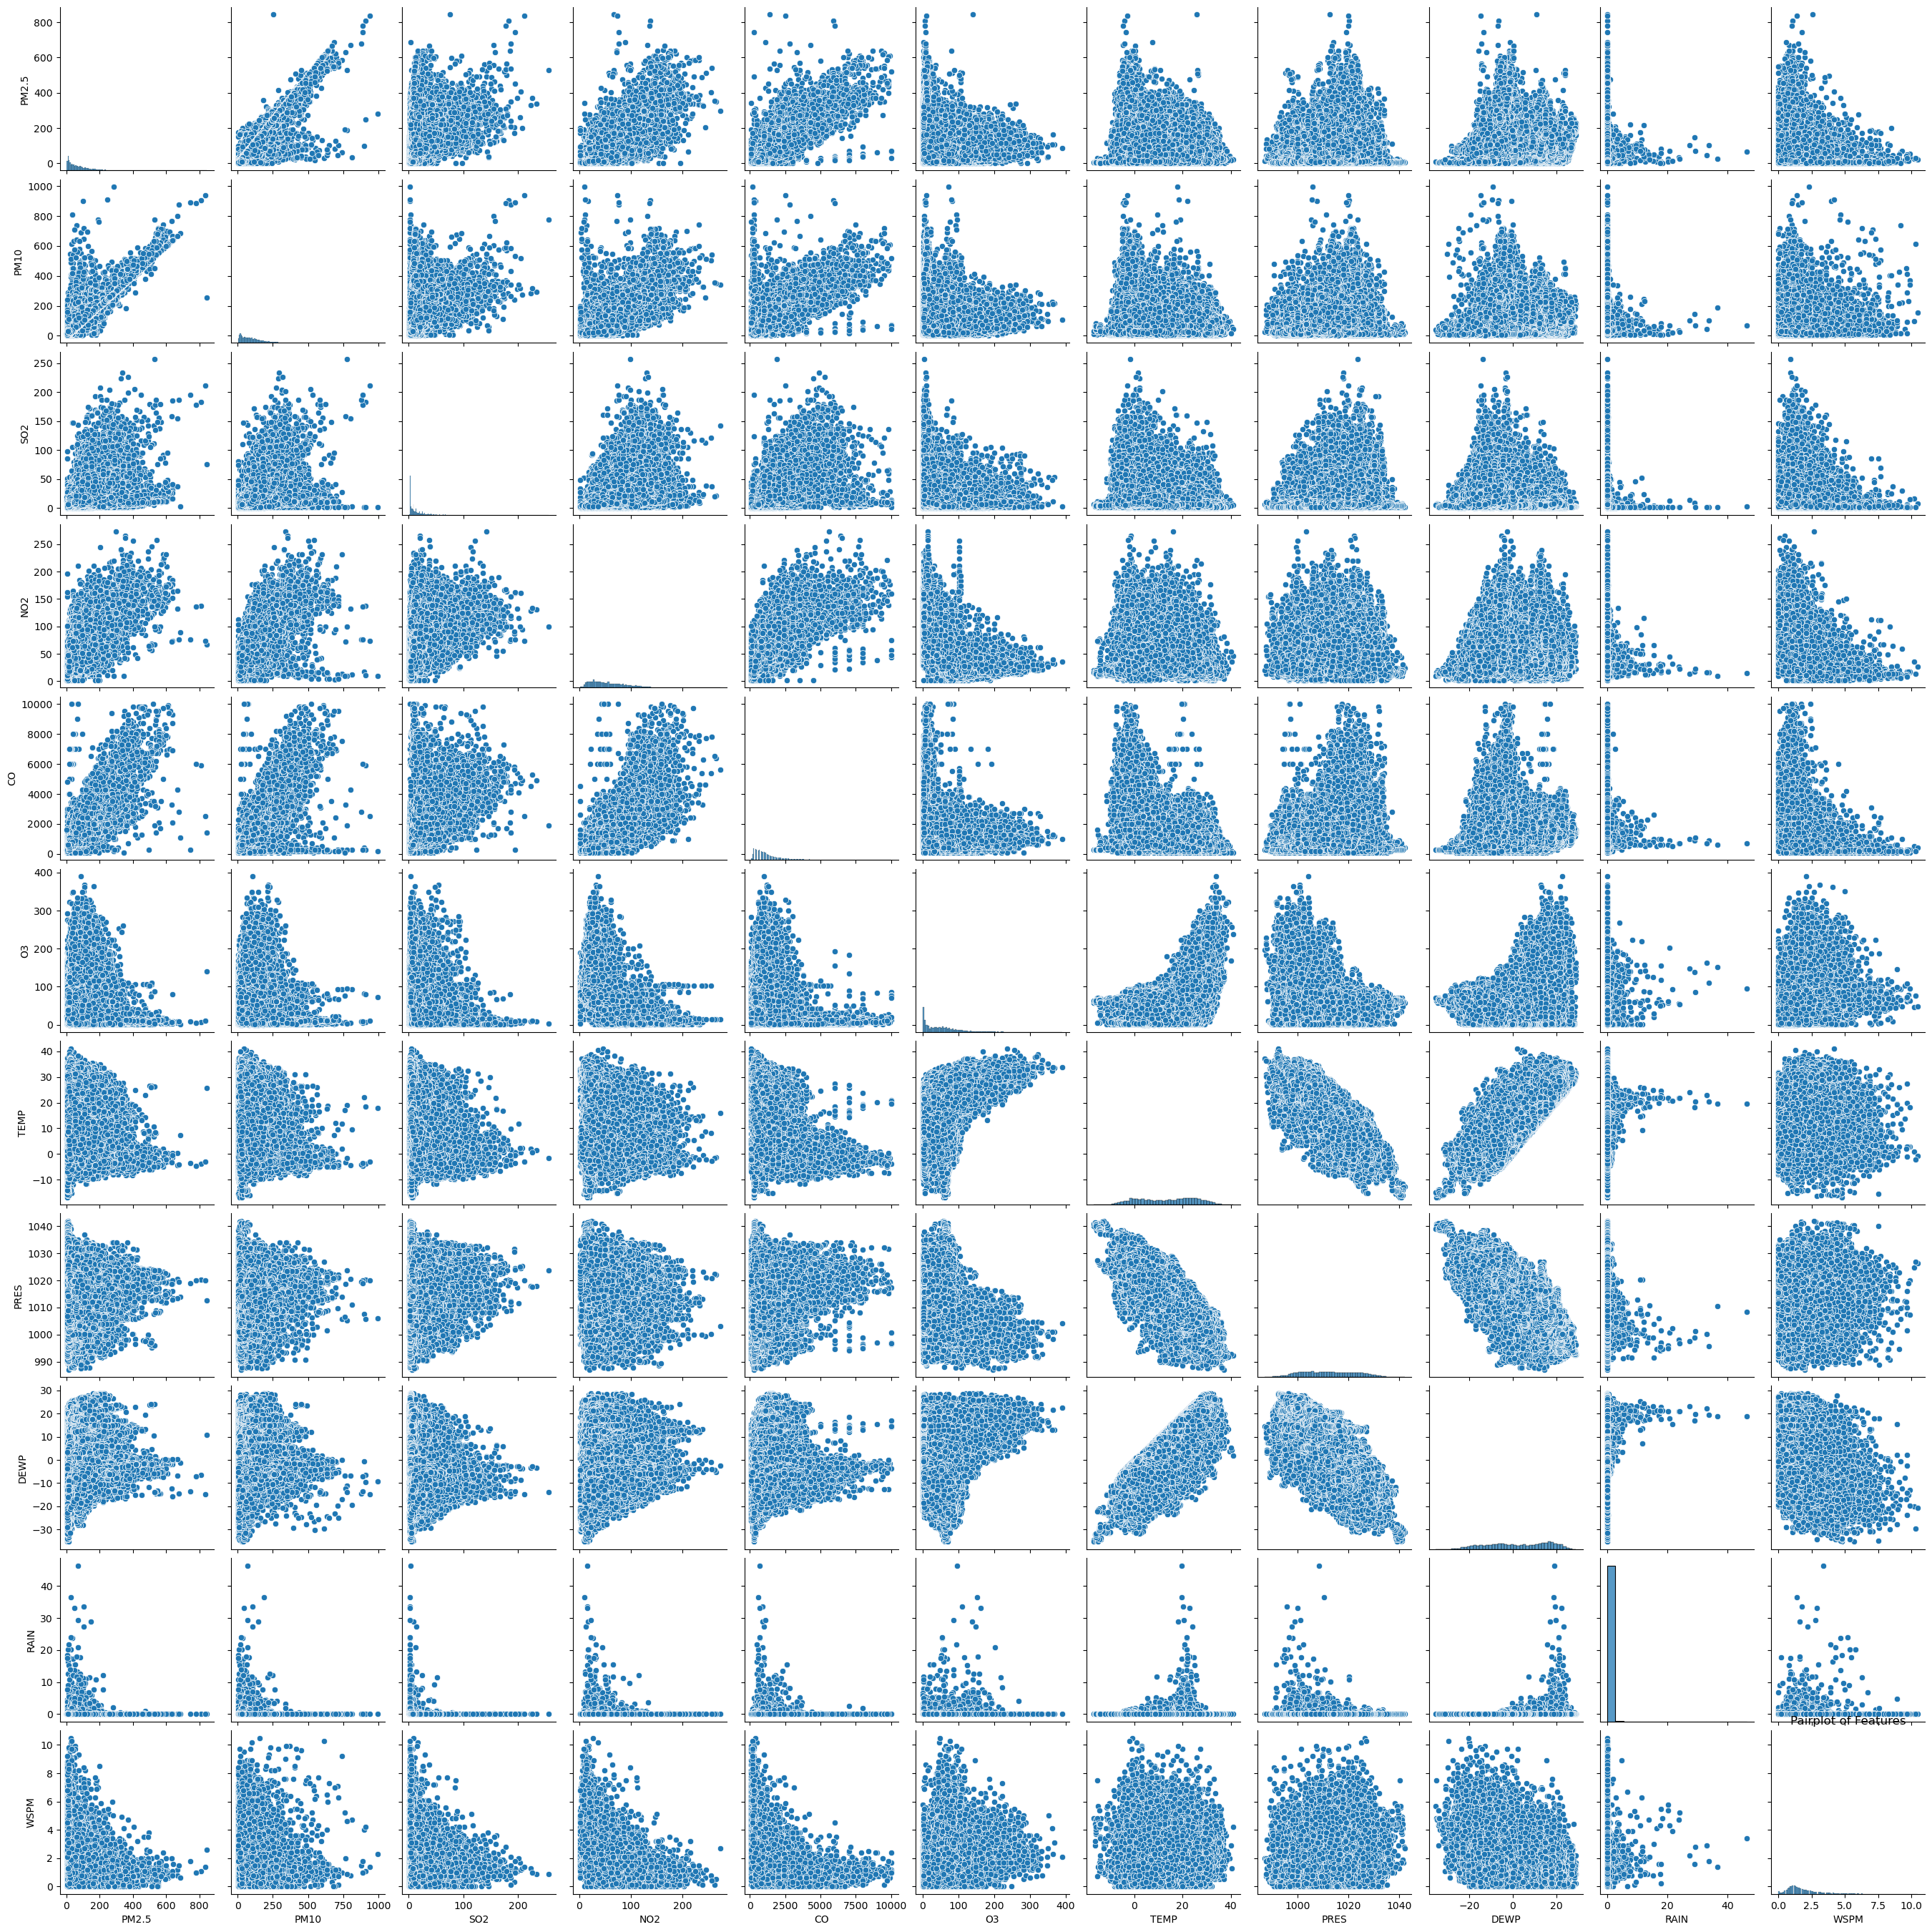

In [20]:
features = ['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']
sns.pairplot(df[features])
plt.title('Pairplot of Features')
plt.show()

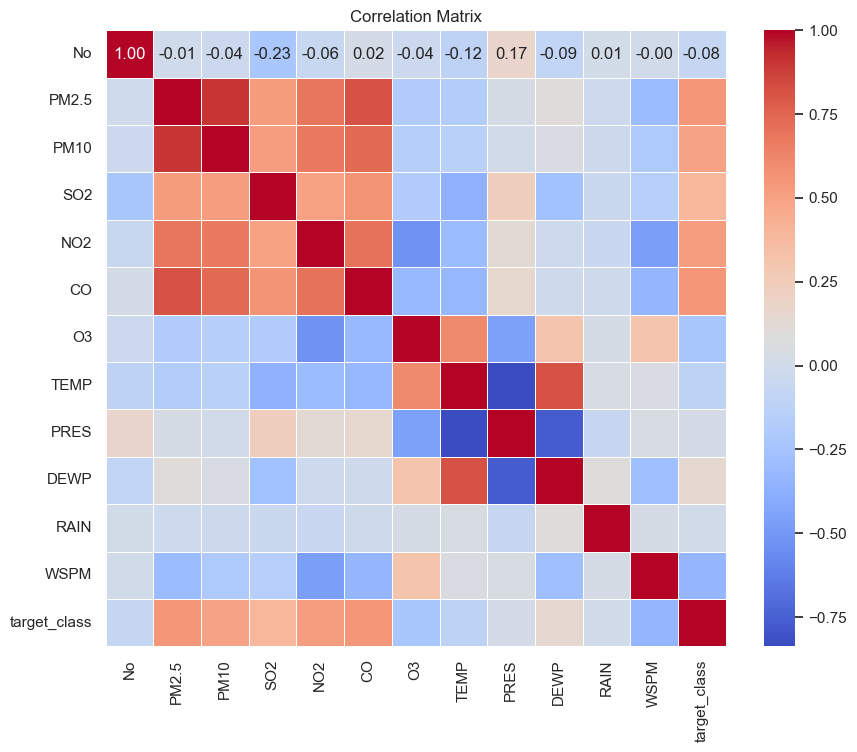

Columns with low correlation: []


In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
correlation_matrix = df.corr(numeric_only=True)

# Plot the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

# Identify columns with low correlation coefficients
low_correlation_columns = []
threshold = 0.2  

for column in correlation_matrix.columns:
    if all(abs(correlation_matrix[column]) < threshold):
        low_correlation_columns.append(column)

print("Columns with low correlation:", low_correlation_columns)


In [34]:
print(correlation_matrix)


                    No     PM2.5      PM10       SO2       NO2        CO  \
No            1.000000 -0.011380 -0.035343 -0.231077 -0.055963  0.023122   
PM2.5        -0.011380  1.000000  0.904115  0.533271  0.689565  0.813926   
PM10         -0.035343  0.904115  1.000000  0.521346  0.676272  0.740188   
SO2          -0.231077  0.533271  0.521346  1.000000  0.498376  0.568786   
NO2          -0.055963  0.689565  0.676272  0.498376  1.000000  0.703330   
CO            0.023122  0.813926  0.740188  0.568786  0.703330  1.000000   
O3           -0.035281 -0.188672 -0.161575 -0.190739 -0.524125 -0.315599   
TEMP         -0.119090 -0.173368 -0.145583 -0.359613 -0.302752 -0.320972   
PRES          0.172940  0.028297 -0.002099  0.232694  0.129550  0.151486   
DEWP         -0.088871  0.097902  0.050900 -0.266988 -0.019336 -0.019061   
RAIN          0.008396 -0.022391 -0.033077 -0.045475 -0.052428 -0.013431   
WSPM         -0.003583 -0.301012 -0.204952 -0.153507 -0.469336 -0.340995   
target_class

In [39]:
low_correlation_with_target = [column for column, correlation in target_correlation.items() if abs(correlation) < target_threshold]
print("Columns with low correlation with target_class:", low_correlation_with_target)


Columns with low correlation with target_class: ['No', 'TEMP', 'PRES', 'DEWP', 'RAIN']


In [40]:
X= df[['PM2.5', 'PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM']]
y = df['target_class']

In [41]:
X=pd.get_dummies(X)

In [42]:
imputer = SimpleImputer(strategy="mean")
X1=imputer.fit_transform(X)
X1=pd.DataFrame(X1,columns=X.columns)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)

In [45]:
classifier = DecisionTreeClassifier(criterion='entropy')
classifier.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [47]:
y_pred = classifier.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9998574076714672


In [54]:
classifier1 = DecisionTreeClassifier(criterion='gini')  
classifier1.fit(X_train, y_train)

DecisionTreeClassifier()

In [55]:
y_pred1 = classifier1.predict(X_test)

In [56]:

accuracy = accuracy_score(y_test, y_pred1)
print("Accuracy:", accuracy)

Accuracy: 0.9998574076714672


TypeError: can only concatenate str (not "numpy.int64") to str

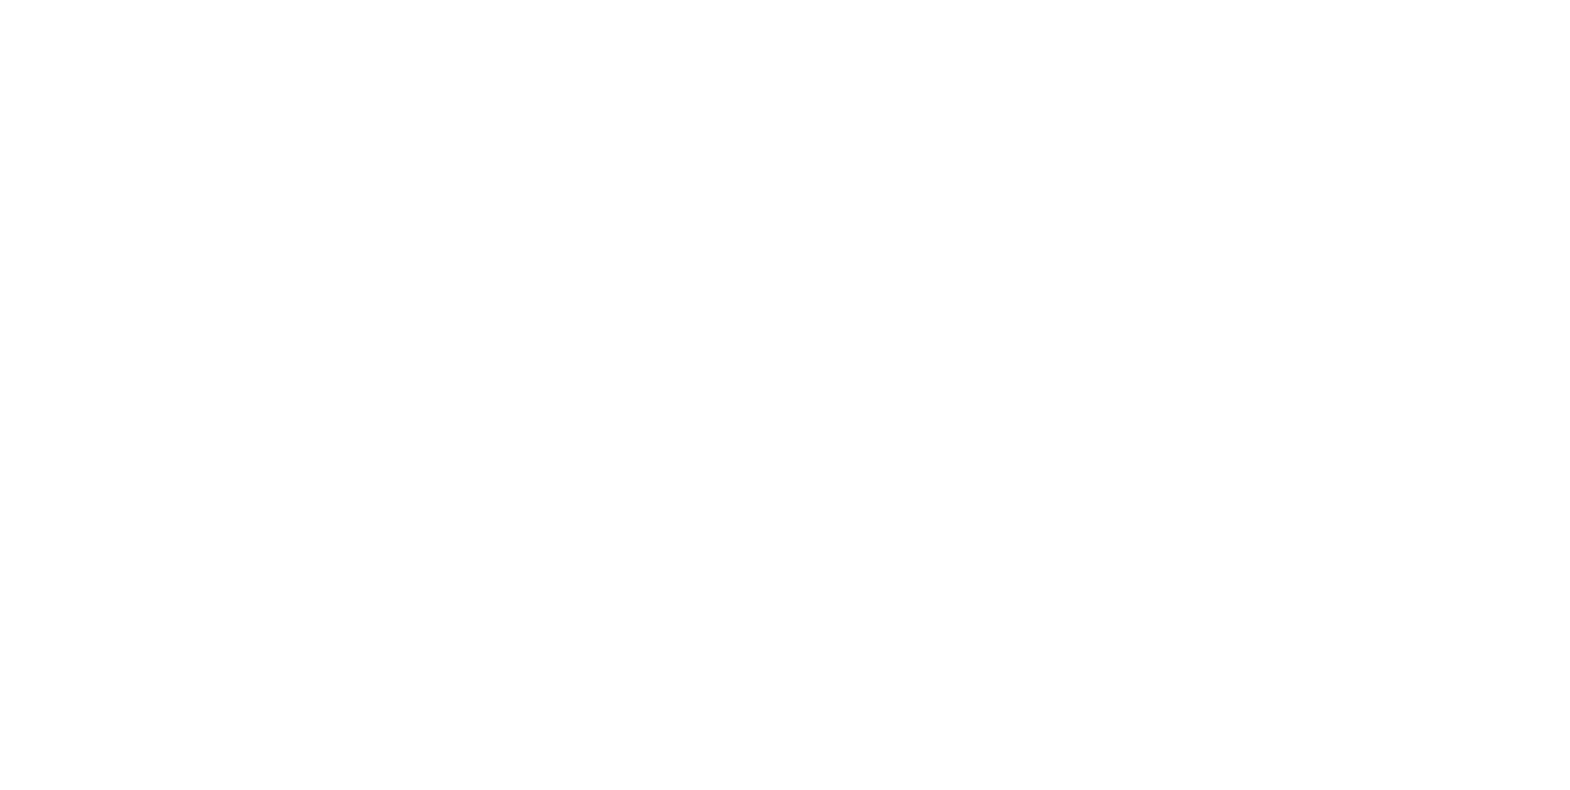

In [59]:
feature_names = [str(feature) for feature in X_train.columns]

# Now you can use 'feature_names' in the plot_tree function
plt.figure(figsize=(20,10))
plot_tree(classifier, filled=True, feature_names=feature_names, class_names=classifier.classes_)
plt.show()